<a href="https://colab.research.google.com/github/Modinat-A/CE888/blob/main/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Objective: Create, train, and test a CNN model

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten


In [39]:
dataset_name = "cifar10"

if dataset_name == "cifar10":
    dataset = tf.keras.datasets.cifar10
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer','dog', 'frog', 'horse', 'ship', 'truck']
    # CIFAR10 images are 32*32*3.
    accuracy_threshold = 0.6  
elif dataset_name == "fashion":
    dataset = tf.keras.datasets.fashion_mnist
    class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat','Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
    accuracy_threshold = 0.8
elif dataset_name == "mnist":
    accuracy_threshold = 0.96 
    dataset = tf.keras.datasets.mnist
    class_names = ['zero', 'one', 'two', 'three', 'four','five', 'six', 'seven', 'eight', 'nine']
else:
    print("unknown dataset")
    raise Exception("Please specify a valid dataset!")

(train_images0, train_labels0), (test_images0, test_labels0) = dataset.load_data()

print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))

train_labels = train_labels0.reshape(-1)
test_labels = test_labels0.reshape(-1)

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


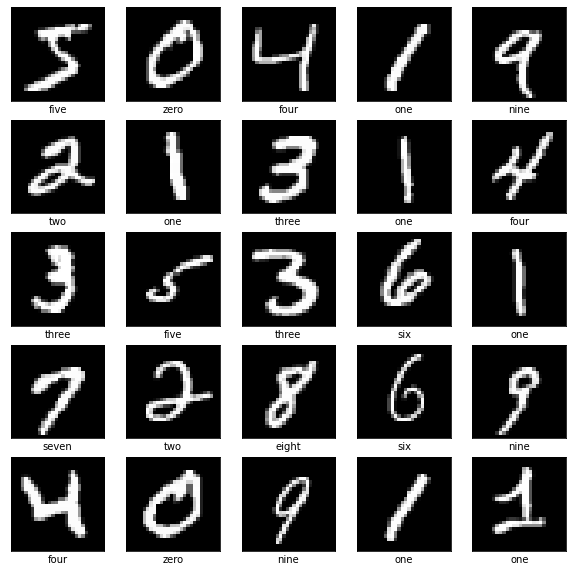

In [3]:
# plot a few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

In [4]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images = (test_images0 / 255.0).astype(np.float32) # 10000 test patterns, shape 10000*28*28  
train_images = (train_images0 / 255.0).astype(np.float32) # 60000 train patterns, shape 60000*28*28

if len(train_images.shape) == 3:  # images must be rank-4 tensors [number_of_images, dimension1, dimension2, number_of_channels]
    # add a single channel to these black-and-white images
    train_images=train_images.reshape(list(train_images.shape)+[1])
    test_images=test_images.reshape(list(test_images.shape)+[1])
    print("Reshaped images from ", train_images0.shape, "to", train_images.shape, "so that 'channel' dimension exists")

num_classification_categories = train_labels.max() + 1
print(num_classification_categories)

Reshaped images from  (60000, 28, 28) to (60000, 28, 28, 1) so that 'channel' dimension exists
10


In [19]:
# build model with CNN architecture

model = keras.Sequential()

# YOUR CODE HERE (no need to specify the input shape in the first layer)
model.add(layers.Conv2D(kernel_size = (3,3), filters =6, padding="same" ,strides=(1, 1),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(kernel_size = (3,3), filters =3, padding="same" ,strides=(1, 1),activation="relu"))
model.add(layers.MaxPooling2D(2,2))
model.add(Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(num_classification_categories, activation='softmax'))

In [20]:
model.build(input_shape=(None,) + train_images.shape[1:])
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_14 (Conv2D)          (None, 28, 28, 6)         60        
                                                                 
 max_pooling2d_14 (MaxPoolin  (None, 14, 14, 6)        0         
 g2D)                                                            
                                                                 
 conv2d_15 (Conv2D)          (None, 14, 14, 3)         165       
                                                                 
 max_pooling2d_15 (MaxPoolin  (None, 7, 7, 3)          0         
 g2D)                                                            
                                                                 
 flatten_7 (Flatten)         (None, 147)               0         
                                                                 
 dense_14 (Dense)            (None, 128)              

In [21]:
if model.count_params() > 800000 and dataset_name == "cifar10":
    print("The lab7 quiz has a 10MB limit on your model size, so use a smaller model if you want to validate through the auto-marker!")

In [22]:
optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=5,
                validation_data=(test_images, test_labels))


Epoch 1/5
469/469 [==============================] - 13s 7ms/step - loss: 0.4428 - accuracy: 0.8754 - val_loss: 0.1608 - val_accuracy: 0.9509
Epoch 2/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1470 - accuracy: 0.9549 - val_loss: 0.1310 - val_accuracy: 0.9598
Epoch 3/5
469/469 [==============================] - 3s 7ms/step - loss: 0.1088 - accuracy: 0.9658 - val_loss: 0.1017 - val_accuracy: 0.9671
Epoch 4/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0892 - accuracy: 0.9722 - val_loss: 0.0754 - val_accuracy: 0.9747
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0769 - accuracy: 0.9761 - val_loss: 0.0696 - val_accuracy: 0.9767


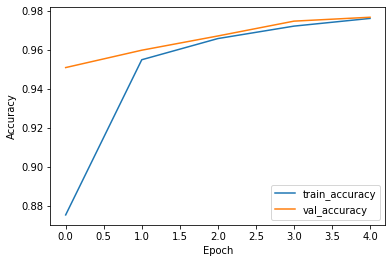

In [23]:
# plot accuracy 
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

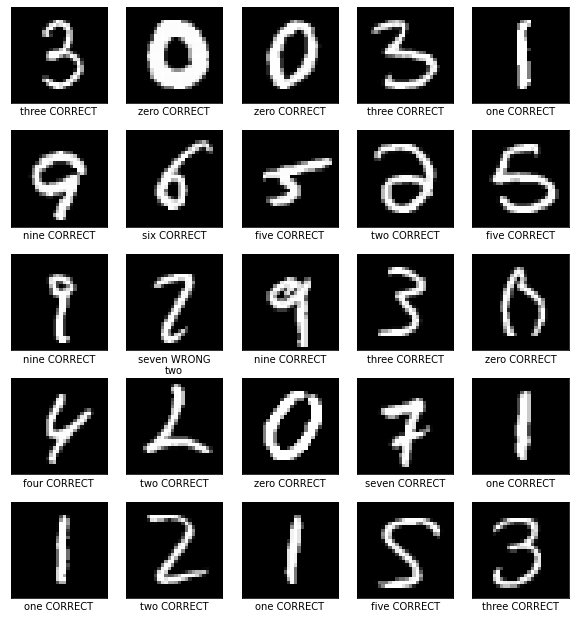

In [24]:
plt.figure(figsize=(10,11))
# plot 25 random images from the test set.
first_index = np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
        # Add a label underneath, if we have one...
        prediction = model(test_images[i:i+1])[0,:]
        prediction_class = np.argmax(prediction)
        true_label = test_labels[i]
        class_name = class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG\n{}".format(class_names[true_label])))
plt.subplots_adjust(hspace=0.2)
plt.show()

In [25]:
if history.history["val_accuracy"][-1] > accuracy_threshold:
    print("Your model is accurate enough!")
    # Save the model into a local folder
    keras.models.save_model(model, "Model1"+dataset_name+".h5",save_format='h5')
else:
    print("Accuracy is below the threshold!")
    raise Exception("Your model isn't accurate enough to pass the progress checker!")

Your model is accurate enough!


## CIFAR10 image set

In [36]:
print('Train: X=%s, y=%s' % (train_images0.shape, train_labels0.shape))
print('Test: X=%s, y=%s' % (test_images0.shape, test_labels0.shape))

train_labels = train_labels0.reshape(-1)
test_labels = test_labels0.reshape(-1)



Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


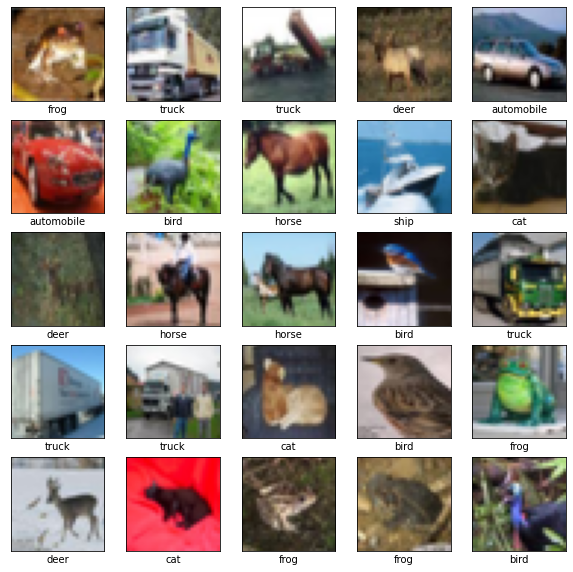

In [40]:
# plot a few images
plt.figure(figsize=(10,10))
for i in range(25):
    # define subplot
    plt.subplot(5,5,i+1)
    # plot raw pixel data
    plt.imshow(train_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
        # Add a label underneath, if we have one...
        plt.xlabel(class_names[train_labels[i]])
plt.show()

In [43]:
# Rescale greyscale from 8 bit to floating point (by dividing by 255)
test_images = (test_images0 / 255.0).astype(np.float32) # 10000 test patterns, shape 10000, 32, 32, 3  
train_images = (train_images0 / 255.0).astype(np.float32) # 50000 train patterns, shape 50000, 32, 32, 3

num_classification_categories = train_labels.max() + 1
print(num_classification_categories)

10


In [54]:
model = keras.Sequential()

# YOUR CODE HERE (no need to specify the input shape in the first layer)
model.add(layers.Conv2D(kernel_size = (3,3), filters =16, padding="same" ,strides=(1, 1),activation="tanh"))
model.add(layers.Conv2D(kernel_size = (3,3), filters =32, padding="same" ,strides=(1, 1),activation="tanh"))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size = (3,3), filters =64, padding="same" ,strides=(1, 1),activation="tanh"))
model.add(layers.Conv2D(kernel_size = (3,3), filters =64, padding="same" ,strides=(1, 1),activation="tanh"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(rate=0.2))
model.add(layers.Conv2D(kernel_size = (3,3), filters =128, padding="same" ,strides=(1, 1),activation="tanh"))
model.add(layers.Conv2D(kernel_size = (3,3), filters =128, padding="same" ,strides=(1, 1),activation="tanh"))
model.add(layers.MaxPool2D(2,2))
model.add(layers.Dropout(rate=0.2))
model.add(Flatten())
model.add(layers.Dense(128, activation='tanh'))
model.add(layers.Dense(num_classification_categories, activation='softmax'))

In [55]:
model.build(input_shape=(None,) + train_images.shape[1:])
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_26 (Conv2D)          (None, 32, 32, 16)        448       
                                                                 
 conv2d_27 (Conv2D)          (None, 32, 32, 32)        4640      
                                                                 
 max_pooling2d_21 (MaxPoolin  (None, 16, 16, 32)       0         
 g2D)                                                            
                                                                 
 dropout_3 (Dropout)         (None, 16, 16, 32)        0         
                                                                 
 conv2d_28 (Conv2D)          (None, 16, 16, 64)        18496     
                                                                 
 conv2d_29 (Conv2D)          (None, 16, 16, 64)        36928     
                                                     

In [58]:
optimizer = keras.optimizers.Adam()

model.compile(optimizer=optimizer,  
              loss=keras.losses.SparseCategoricalCrossentropy(), 
              metrics=['accuracy'])

history = model.fit(train_images, train_labels,
                batch_size=128,
                epochs=10,
                validation_data=(test_images, test_labels))

Epoch 1/10
391/391 [==============================] - 14s 33ms/step - loss: 0.6967 - accuracy: 0.7572 - val_loss: 0.7661 - val_accuracy: 0.7378
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 0.6689 - accuracy: 0.7667 - val_loss: 0.7539 - val_accuracy: 0.7481
Epoch 3/10
391/391 [==============================] - 13s 32ms/step - loss: 0.6307 - accuracy: 0.7789 - val_loss: 0.7721 - val_accuracy: 0.7373
Epoch 4/10
391/391 [==============================] - 12s 32ms/step - loss: 0.6137 - accuracy: 0.7851 - val_loss: 0.7405 - val_accuracy: 0.7492
Epoch 5/10
391/391 [==============================] - 12s 31ms/step - loss: 0.5888 - accuracy: 0.7937 - val_loss: 0.7413 - val_accuracy: 0.7429
Epoch 6/10
391/391 [==============================] - 12s 31ms/step - loss: 0.5754 - accuracy: 0.7998 - val_loss: 0.7830 - val_accuracy: 0.7420
Epoch 7/10
391/391 [==============================] - 12s 31ms/step - loss: 0.5641 - accuracy: 0.8030 - val_loss: 0.7101 - val_accuracy:

In [57]:
print(history.history["val_accuracy"][-1])# 5 epochs, tanh, extra conv

0.7437999844551086


In [59]:
print(history.history["val_accuracy"][-1]) # 10 epochs, tanh, extra conv

0.7612000107765198


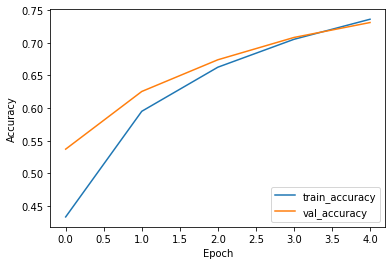

In [51]:
# plot accuracy 
plt.plot(history.history['accuracy'], label='train_accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

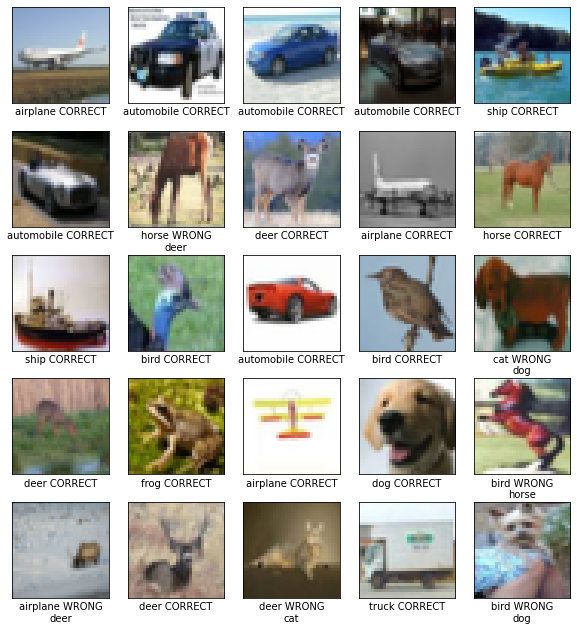

In [52]:
plt.figure(figsize=(10,11))
# plot 25 random images from the test set.
first_index = np.random.randint(len(test_images)-25)
for i in range(first_index,first_index+25):
    # define subplot
    plt.subplot(5,5,i+1-first_index)
    # plot raw pixel data
    plt.imshow(test_images0[i], cmap=plt.get_cmap('gray'))
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    if class_names != None:
        # Add a label underneath, if we have one...
        prediction = model(test_images[i:i+1])[0,:]
        prediction_class = np.argmax(prediction)
        true_label = test_labels[i]
        class_name = class_names[prediction_class]
        plt.xlabel(class_name+" "+("CORRECT" if prediction_class==true_label else "WRONG\n{}".format(class_names[true_label])))
plt.subplots_adjust(hspace=0.2)
plt.show()

In [53]:
if history.history["val_accuracy"][-1] > accuracy_threshold:
    print("Your model is accurate enough!")
    # Save the model into a local folder
    keras.models.save_model(model, "Model1"+dataset_name+".h5",save_format='h5')
else:
    print("Accuracy is below the threshold!")
    raise Exception("Your model isn't accurate enough to pass the progress checker!")

Your model is accurate enough!
